# SIGNATURE VERIFICATION




## Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
config =tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sys
from PIL import Image
sys.modules['Image'] = Image

## Import Train and Test data sets

In [2]:
DATADIR =r"C:\Users\CHINMAY\Desktop\fc\Dataset_Signature_Final\Dataset\dataset1"   # TRAIN DATASET
VALDIR=r"C:\Users\CHINMAY\Desktop\fc\sample_Signature\sample_Signature"            #TEST DATASET


## Creating a model

In [3]:
IMG_SIZE=28

model = tf.keras.models.Sequential([
    # 1st CONVOLUTIONAL LAYER
    
    tf.keras.layers.Conv2D((64),(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3),padding='same'),
    tf.keras.layers.MaxPooling2D(3,3),
    
    # 2nd CONVOLUTIONAL LAYER
    
    tf.keras.layers.Conv2D((64),(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(3,3),
    
    # 3rd CONVOLUTIONAL LAYER
    
    tf.keras.layers.Conv2D((64),(2,2),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # DEEP NEURAL NETWORK
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense((64),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

## Model Compile

In [6]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Creating ImageDataGenerator 

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                   DATADIR,
                   target_size=(28,28),
                   batch_size=20,
                   class_mode='binary')


val_datagen=ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
                   VALDIR,
                   target_size=(28,28),
                   batch_size=20,
                   class_mode='binary')

Found 1360 images belonging to 2 classes.
Found 579 images belonging to 2 classes.


## Model fitting 

## Plotting graphs on the basis of the accuracies and losses of the training and validation datasets

In [8]:
history= model.fit(train_generator,validation_data=val_generator,epochs=10)

Train for 68 steps, validate for 29 steps
Epoch 1/10
68/68 [==============================] - 13s 197ms/step - loss: 0.6900 - accuracy: 0.5390 - val_loss: 0.6902 - val_accuracy: 0.6321
Epoch 2/10
68/68 [==============================] - 12s 178ms/step - loss: 0.6866 - accuracy: 0.5522 - val_loss: 0.6874 - val_accuracy: 0.4974
Epoch 3/10
68/68 [==============================] - 12s 177ms/step - loss: 0.6752 - accuracy: 0.5809 - val_loss: 0.6602 - val_accuracy: 0.5803
Epoch 4/10
68/68 [==============================] - 12s 177ms/step - loss: 0.6462 - accuracy: 0.6213 - val_loss: 0.6016 - val_accuracy: 0.6701
Epoch 5/10
68/68 [==============================] - 12s 175ms/step - loss: 0.5406 - accuracy: 0.7368 - val_loss: 0.4538 - val_accuracy: 0.8117
Epoch 6/10
68/68 [==============================] - 12s 175ms/step - loss: 0.4349 - accuracy: 0.7904 - val_loss: 0.3315 - val_accuracy: 0.9292
Epoch 7/10
68/68 [==============================] - 12s 180ms/step - loss: 0.2613 - accuracy: 0.9110

# Training evaluation

In [20]:
print("Overall Training Loss and Accuracy")
model.evaluate(train_generator)


Overall Training Loss and Accuracy
68/68 [==============================] - 7s 105ms/step - loss: 0.0158 - accuracy: 0.9985


[0.015793667626841104, 0.99852943]

# Testing evaluation

In [21]:
print("Overall Validation Loss and Accuracy")
model.evaluate(val_generator)

Overall Validation Loss and Accuracy
29/29 [==============================] - 4s 153ms/step - loss: 0.0200 - accuracy: 0.9965


[0.019961067250576513, 0.9965458]

# Summary 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

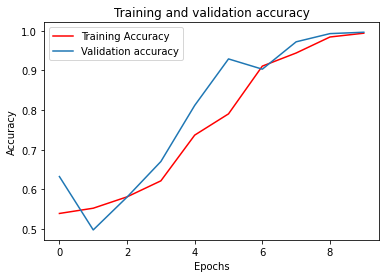

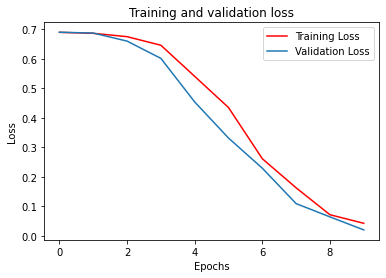

In [9]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot  ( epochs,     acc ,'r', label= 'Training Accuracy')
plt.plot  ( epochs, val_acc, label='Validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot  ( epochs,     loss ,'r', label= 'Training Loss' )
plt.plot  ( epochs, val_loss , label= 'Validation Loss')
plt.title ('Training and validation loss'   )
plt.legend()

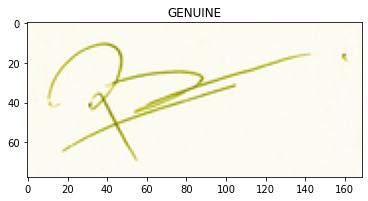

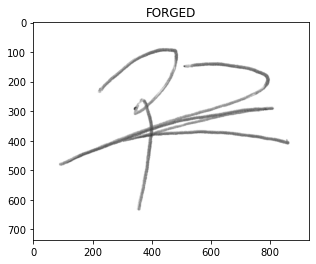

In [42]:
genuine = cv2.imread(r"C:\Users\CHINMAY\Desktop\genuine1.png")
forged = cv2.imread(r"C:\Users\CHINMAY\Desktop\forged1.png")

plt.title("GENUINE")
plt.imshow(genuine)
plt.show()


plt.title("FORGED")
plt.imshow(forged)
plt.show()


## Predicting the signatures.

genuine


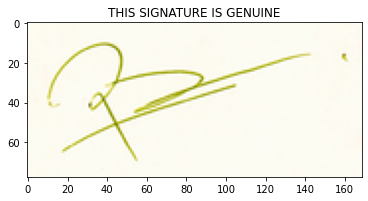

In [44]:
model.save=("signature.h5")


from keras.preprocessing import image
pic=r"C:\Users\CHINMAY\Desktop\genuine1.png"
image1=image.load_img(pic)                    
image1=image1.resize((28,28))
image1=image.img_to_array(image1)
image1=np.expand_dims(image1,axis=0)
result=model.predict(image1)
if result[0][0] == 1:
    prediction = 'genuine'
    print(prediction)
    genuine = cv2.imread(pic)
    plt.title("THIS SIGNATURE IS GENUINE")
    plt.imshow(genuine)
    plt.show()
else:
    prediction = 'forged'
    print(prediction)
    forged = cv2.imread(pic)
    plt.title("THIS SIGNATURE IS FORGED")
    plt.imshow(forged)
    plt.show()
    